# Q-learning

## library import

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

## 랜덤으로 돌려보기 위한 함수 rargmax 작성

numpy는 행렬내부의 모든 값이 같을 때 가장 첫번째 것을 리턴한다.

In [2]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

## gym을 돌리기 위한 env 세팅

In [3]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
            'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

[2017-10-15 01:37:34,772] Making new env: FrozenLake-v3


## 행렬 초기화

In [4]:
# 테이블의 모든 요소를 0으로 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])
# num_episodes :: 학습시킬 횟수
num_episodes = 2000
# 총 reward를 초기화할 리스트를 생성
# 각 에피소드에서의 reward, step을 가지고 있을 리스트이다.
rList = []

## 학습코드 

In [5]:
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = rargmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state,:])
        rAll += reward
        state = new_state
    rList.append(rAll)

## 학습결과 출력 ( Q형님의 데이터 확인)

In [6]:
print("Success rate : " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
# 제대로 학습됬는지 확인

Success rate : 0.963
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


## matplotlib을 이용해 그래프로 성공율 확인

Success rate : 0.963


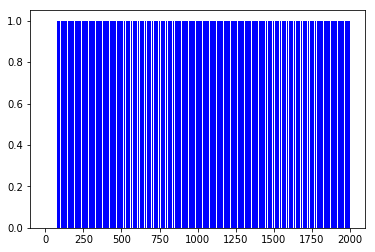

In [7]:
print("Success rate : " + str(sum(rList) / num_episodes))
# 언제 성공하고, 언제 실패했는지 보기 위해 bar차트로 그려본다. 
plt.bar(range(len(rList)), rList, color="blue")
# 언제 성공하고, 언제 실패했는지 보여줌
plt.show()